# Network Visualizations and Natural Language Processing with Python
# Exercise 1.5: Text Mining

In [1]:
# Libraries instalation
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZenBook\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ZenBook\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ZenBook\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ZenBook\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Import txt file

with open('Key_events_of_the_20th_century.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

In [3]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['    Key events of the 20th century - Wikipedia                            Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages                    Search            Search                       Appearance                 Donate  Create account  Log in         Personal tools      Donate Create account Log in                             Contents move to sidebar hide     (Top)      1 Historic events in the 20th century     Toggle Historic events in the 20th century subsection      1.1 World at the beginning of the century       1.1.1 "The war to end all wars": World War I (1914вЂ“1918)           1.2 Spanish flu       1.2.1 Russian Revolution and communism           1.3 Between the wars       1.3.1 Economic depression         1.3.2 The rise of dictatorship           1.4 Global war: Wor

In [4]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'in', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1', 'Historic', 'events', 'in', 'the', '20th', 'century', 'Toggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection', '1.1', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', '``', 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914вЂ', '“', '1918', ')', '1.2', 'Spanish', 'flu', '1.2.1', 'Russian', 'Revolution', 'and', 'communism', '1.3', 'Between', 'the'

In [5]:
# check words frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4926 samples and 22539 outcomes>


In [6]:
dist_words.most_common(10)

[('.', 1616),
 ('the', 1136),
 (',', 983),
 ('of', 628),
 ('and', 414),
 ('to', 334),
 ('The', 331),
 ('in', 312),
 ('[', 309),
 (']', 309)]

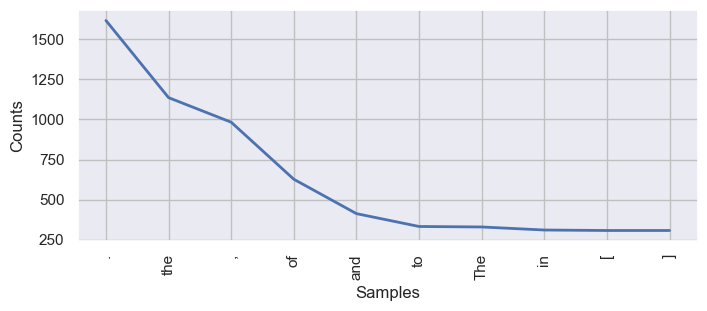

In [7]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

# Removing stopwords in words

In [8]:
# Load countries lookup list

countries = pd.read_csv(r"C:\Users\ZenBook\countries_list_20th_century_1.5.csv")
country_list = set(countries['country_name'].str.lower())

In [9]:
# Define minimal noise removal
import string

noise_words = {"the", "The", "a", "of", "as", "and", "to", "in", "by", "such", "its", "it's"}
noise_words.update(string.punctuation)

In [10]:
# Filter tokens with whitelist protection

filtered_words = []
for word in tokenized_word:
    # Keep if it's a country OR not in noise words
    if word in country_list or (word.isalpha() and word not in noise_words):
        filtered_words.append(word)

print(filtered_words)

['Key', 'events', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'century', 'Toggle', 'Historic', 'events', 'century', 'subsection', 'World', 'at', 'beginning', 'century', 'war', 'end', 'all', 'wars', 'World', 'War', 'I', 'Spanish', 'flu', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific', 'Background', 'Jap

In [11]:
# Create a new FreqDist for filtered–words

dist_words_filter = FreqDist(filtered_words)
print (dist_words_filter)

<FreqDist with 4038 samples and 11760 outcomes>


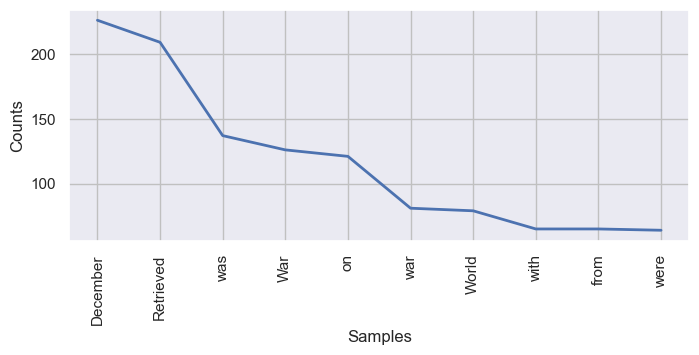

In [12]:
# Frequency Distribution Plot for filtered–words

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10,cumulative = False)
plt.show()

In [13]:
# Substitute all punctuation marks with a space

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                        " ",        # Replace all non-letters with spaces
                        str(filtered_words))

In [14]:
# Word tokenization after punctuation marks substitution

tokenized_word_2 = word_tokenize(sans_punc)
print (tokenized_word_2)

['Key', 'events', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'century', 'Toggle', 'Historic', 'events', 'century', 'subsection', 'World', 'at', 'beginning', 'century', 'war', 'end', 'all', 'wars', 'World', 'War', 'I', 'Spanish', 'flu', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific', 'Background', 'Jap

In [15]:
# check words frequency distribution

dist_words_2 = FreqDist(tokenized_word_2)
print(dist_words_2)

<FreqDist with 4034 samples and 11717 outcomes>


In [16]:
dist_words_2.most_common(10)

[('December', 226),
 ('Retrieved', 209),
 ('was', 137),
 ('War', 126),
 ('on', 121),
 ('war', 82),
 ('World', 79),
 ('with', 65),
 ('from', 65),
 ('were', 64)]

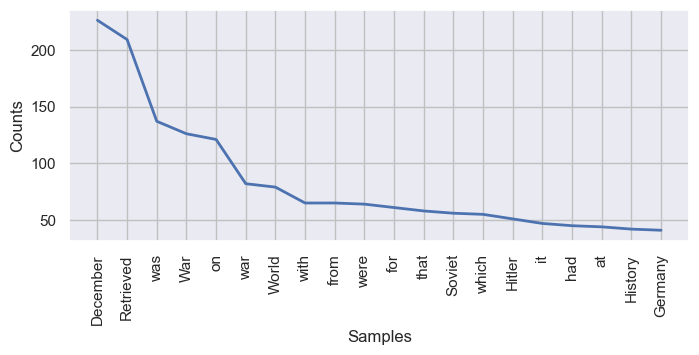

In [17]:
# Frequency Distribution Plot 2

plt.figure(figsize=(8, 3))
dist_words_2.plot(20,cumulative = False)
plt.show()

We can see that after removing stop-words and substitute puncktuation some of the main things or person of 
the 20th-century show up.
On the other hand, some letters have made it into the list, too, like “s” and “th”. This is probably because 
some punctuation marks were removed earlier on when the stop word list was created.

In [18]:
# part of speech tagging (POS) 

new_stopwords = ["And", "Then", 'n', 'th', 's', 'The', 'edit', 'on', 'from', 'were', 'first', 'this', 'these', 'at', 'for', 'that', 'it', 'with', '[', ']']

filtered = []
for word in tokenized_word_2:
     if word not in new_stopwords:
        filtered.append(word)

In [19]:
%%time
from textblob import TextBlob
text = TextBlob(str(filtered))

CPU times: total: 15.6 ms
Wall time: 12.7 ms


In [20]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ZenBook\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [21]:
tags_list = text.tags

In [22]:
# check what tag_list include 
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSpecial", 'NNP'),
 ("'", 'POS'),
 ("'pages", 'NNS'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Donate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'accoun

NN refers to nouns
NNP is a proper noun
POS is part of speech tagging

In [23]:
# store the tag list created as a dataframe
# narrow it down so that it only picks the largest 10 groups on the list

df_text = pd.DataFrame(tags_list)
df_text.columns = [ 'Words', "Word type"]
df_t=df_text.groupby('Word type').count().reset_index()
top20=df_t.nlargest(10, 'Words')

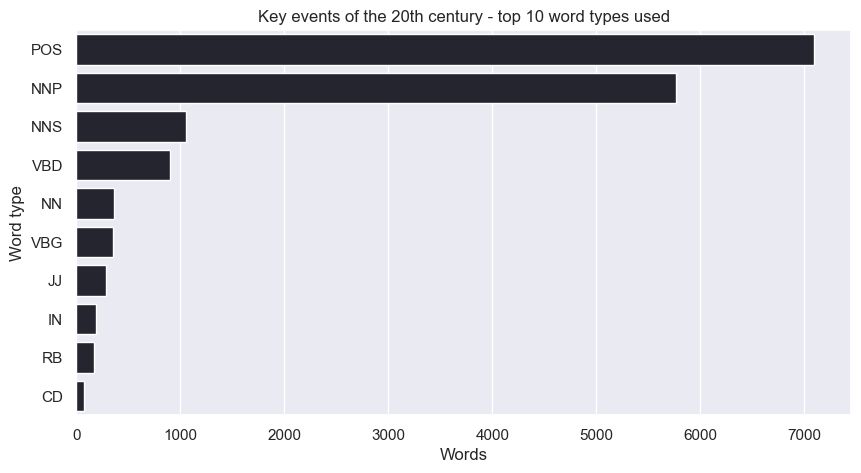

In [24]:
# creating plot of top10 Words from the previously-generated list

plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
      sns.barplot(x = "Words", y = "Word type",
     saturation = 0.9, data = top20).set_title("Key events of the 20th century - top 10 word types used")

Bar plot displaying the top 10 types of words used in Key events of the 20th century (https://en.wikipedia.org/wiki/Key_events_of_the_20th_century)

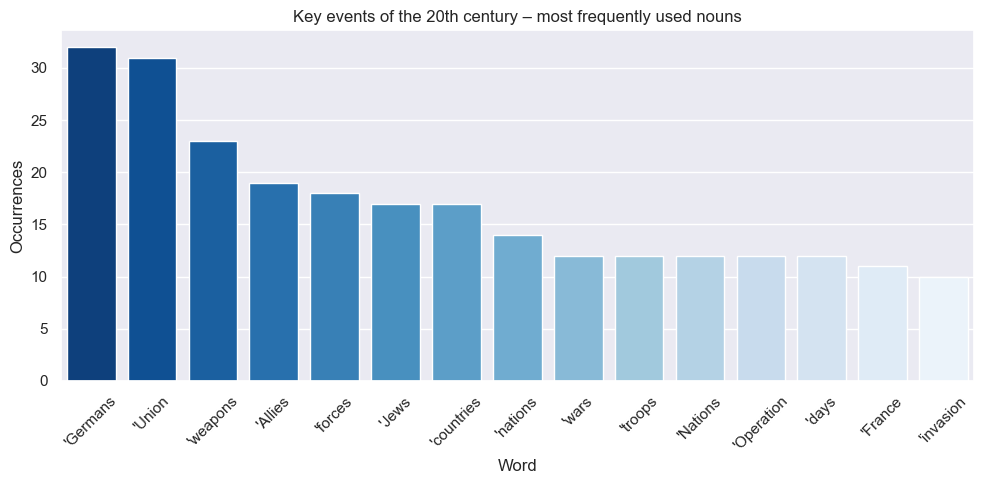

In [25]:
# bar plot with the top 15 POS labels for nouns

df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNS")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top15 = y.nlargest(15, 'Occurrences')

colors = sns.color_palette("Blues", n_colors=len(top15))[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x="Word", y="Occurrences", hue="Word", data=top15,
            palette=colors, saturation=0.9, legend=False)

plt.title("Key events of the 20th century – most frequently used nouns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bar plot displaying the top 15 most frequently used nouns in the Key events of the 20th century

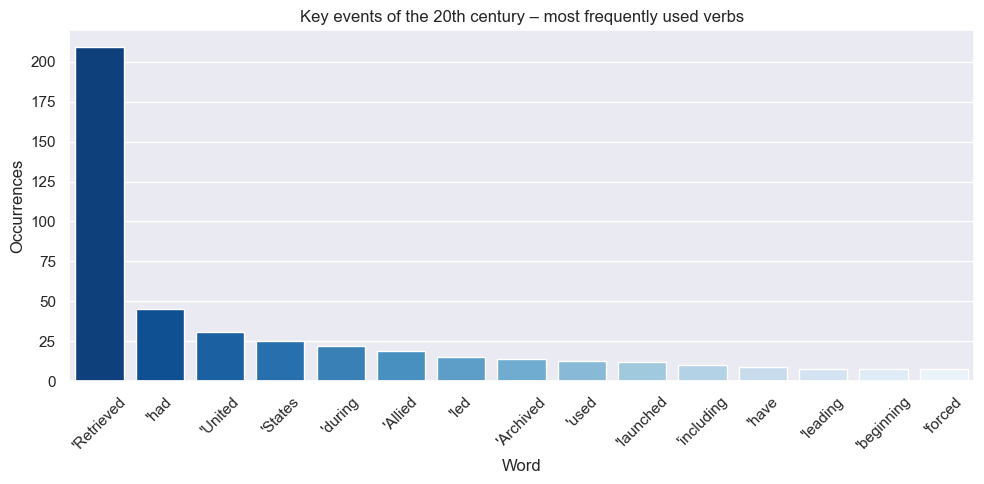

In [26]:
# bar plot with the top 15 POS labels for verbs

# Filter for verb POS tags
verb_tags = ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
df = df_text[df_text['Word type'].isin(verb_tags)]
df.columns = ["Word", "Occurrences"]

# Aggregate and sort
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by='Occurrences', ascending=False)
top15 = y.nlargest(15, 'Occurrences')

# Reverse gradient so most frequent verbs are darkest
colors = sns.color_palette("Blues", n_colors=len(top15))[::-1]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="Word", y="Occurrences", hue="Word", data=top15,
            palette=colors, saturation=0.9, legend=False)

plt.title("Key events of the 20th century – most frequently used verbs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


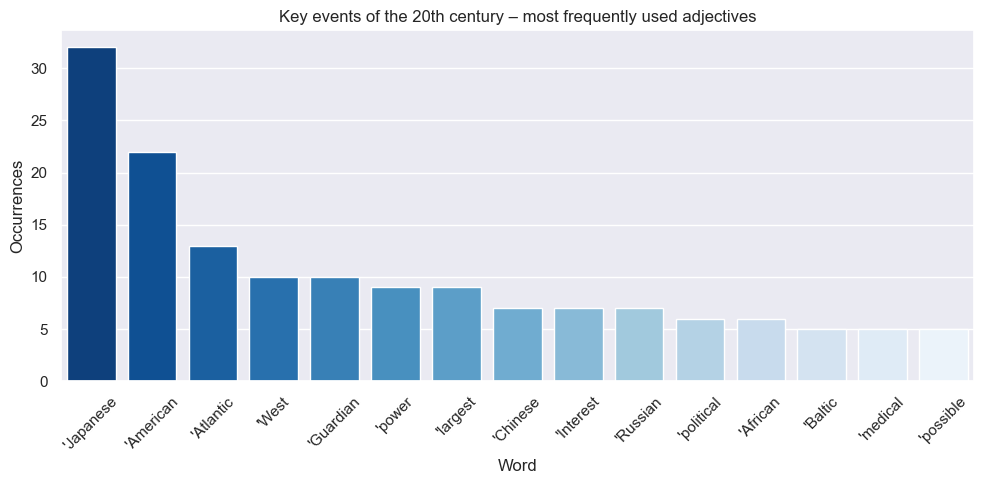

In [27]:
# bar plot with the top 15 POS labels for adjectives


# Filter for adjective POS tags
adj_tags = ["JJ", "JJR", "JJS"]
df = df_text[df_text['Word type'].isin(adj_tags)]
df.columns = ["Word", "Occurrences"]

# Aggregate and sort
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by='Occurrences', ascending=False)
top15 = y.nlargest(15, 'Occurrences')

# Reverse gradient so most frequent adjectives are darkest
colors = sns.color_palette("Blues", n_colors=len(top15))[::-1]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="Word", y="Occurrences", hue="Word", data=top15,
            palette=colors, saturation=0.9, legend=False)

plt.title("Key events of the 20th century – most frequently used adjectives")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

??? Analyzing the results – what do you think stands out in these frequencies? 

# Create a dataframe with the countries and the number of times they’re mentioned in the text

In [28]:
# convert the filtered object that holds the word tokens in a string
listToStr = ' '.join([str(elem) for elem in filtered])

print(listToStr)

Key events century Wikipedia Jump content Main menu Main menu move sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn editCommunity portalRecent changesUpload fileSpecial pages Search Search Appearance Donate Create account Log Personal tools Donate Create account Log Contents move sidebar hide Top Historic events century Toggle Historic events century subsection World beginning century war end all wars World War I Spanish flu Russian Revolution communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External links Toggle table contents Key events centur

In [30]:
# Create a count for the countries

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [31]:
print(all_counts)

Counter({'December': 226, 'Retrieved': 209, 'was': 137, 'War': 126, 'war': 82, 'World': 79, 'Soviet': 56, 'which': 55, 'Hitler': 51, 'had': 45, 'History': 42, 'Germany': 41, 'world': 40, 'ISBN': 40, 'century': 39, 'would': 35, 'In': 34, 'Japan': 33, 'II': 32, 'Japanese': 32, 'Germans': 32, 'German': 31, 'New': 31, 'Union': 31, 'United': 31, 'September': 31, 'Europe': 30, 'but': 30, 'ISSN': 30, 'also': 29, 'became': 29, 'August': 29, 'an': 29, 'July': 28, 'end': 27, 'their': 27, 'his': 27, 'not': 26, 'nuclear': 26, 'after': 25, 'be': 25, 'States': 25, 'June': 25, 'Battle': 25, 'This': 24, 'only': 24, 'April': 24, 'A': 24, 'into': 23, 'new': 23, 'Africa': 23, 'against': 23, 'attack': 23, 'weapons': 23, 'Main': 22, 'Holocaust': 22, 'American': 22, 'during': 22, 'October': 22, 'or': 21, 'Stalin': 21, 'May': 21, 'BBC': 21, 'other': 20, 'over': 20, 'one': 20, 'Britain': 20, 'North': 20, 'Allied': 19, 'Allies': 19, 'British': 19, 'many': 19, 'all': 18, 'Cold': 18, 'history': 18, 'most': 18, '

In [32]:
# Handle aliases / variations

import re

def clean_spaces(s):
    if isinstance(s, str):
        s = re.sub(r'\s+', ' ', s)   # collapse all whitespace
        return s.strip()            # remove leading/trailing
    return s

# Clean the names
countries['country_name'] = countries['country_name'].apply(clean_spaces)

# Alias map
alias_map = {
    "Central African Republic": "Africa",
    "People's Republic of China": "China",
    "Democratic Republic of the Congo": "Congo",
    "Republic of the Congo": "Congo",
    "Czech Republic": "Czechia",
    "United States of America": "USA",
    "United States": "USA",
    "America": "USA",
    "United Kingdom": "UK",
    "Britain": "UK",
    "Russian Federation": "Russia",
    "Federated States of Micronesia": "Micronesia",
    "Donetsk People's Republic": "Ukraine",
    "Luhansk People's Republic": "Ukraine",
    "Sahrawi Arab Democratic Republic": "Sahrawi",
    "South Ossetia": "Ossetia"
}

# Apply aliases
countries['country_alias'] = countries['country_name'].replace(alias_map)

In [33]:
print(countries)

     Unnamed: 0                      country_name country_alias
0             1                       Afghanistan   Afghanistan
1             2                           Albania       Albania
2             3                           Algeria       Algeria
3             4                           Andorra       Andorra
4             5                            Angola        Angola
..          ...                               ...           ...
204         205  Sahrawi Arab Democratic Republic       Sahrawi
205         206                        Somaliland    Somaliland
206         207                     South Ossetia       Ossetia
207         208                            Taiwan        Taiwan
208         209                      Transnistria  Transnistria

[209 rows x 3 columns]


In [34]:
# Create dictionary of counts for countries (using aliases)

dict_of_counts = {}

for _, row in countries.iterrows():
    original = row['country_name']
    alias = row['country_alias']

    # Count both original and alias forms in the text
    count = all_counts.get(original, 0) + all_counts.get(alias, 0)

    # Store using alias as the key
    dict_of_counts[alias] = dict_of_counts.get(alias, 0) + count

In [35]:
 dict_of_counts[alias]

0

In [36]:
# Store results in a DataFrame

df = pd.DataFrame(list(dict_of_counts.items()), columns=['Country', 'Times mentioned'])

print(df)


          Country  Times mentioned
0     Afghanistan                0
1         Albania                4
2         Algeria                2
3         Andorra                0
4          Angola                2
..            ...              ...
201       Sahrawi                0
202    Somaliland                0
203       Ossetia                0
204        Taiwan                0
205  Transnistria                0

[206 rows x 2 columns]


In [37]:
# Filter out countries with zero mentions

mentioned = df[df["Times mentioned"] > 0]

print(mentioned.sort_values(by="Times mentioned", ascending=False).head(20))

         Country  Times mentioned
64       Germany               82
85         Japan               66
60        France               34
191      Vietnam               28
82         Italy               28
140       Poland               26
32        Africa               23
76         India               18
144       Russia               18
69        Guinea               12
139  Philippines               10
130       Norway               10
99         Libya               10
59       Finland                8
78          Iran                8
66        Greece                8
81        Israel                8
182      Ukraine                8
101    Lithuania                6
42          Cuba                6


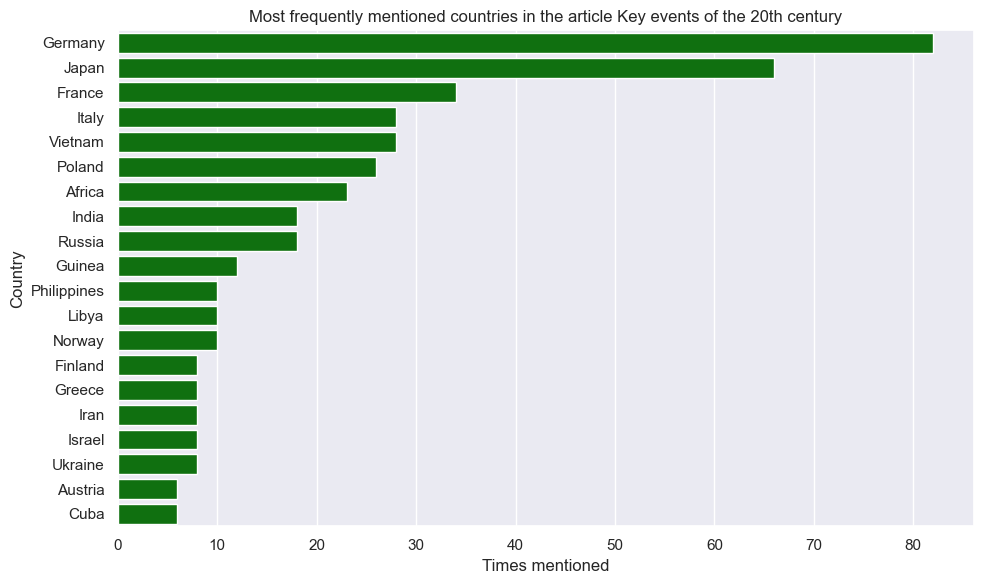

In [42]:
# creating plot of top20 countries mentioned in the previously-generated list

# Select the 20 countries with the highest mention counts
top20 = df.nlargest(20, "Times mentioned")

# Sort ascending so the smallest bar is at the bottom, largest at the top
top20_sorted = top20.sort_values(by="Times mentioned", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Times mentioned", 
    y="Country", 
    data=top20_sorted, 
    color="green"
).set_title("Most frequently mentioned countries in the article Key events of the 20th century")

plt.xlabel("Times mentioned")
plt.ylabel("Country")
plt.tight_layout()
plt.show()